# Lab Fuzzylite control

Noé Benjamín Rosales Medina A00227290

https://github.com/NoeRosales22/LabFLC


In [31]:
%pip install networkx
%pip install numpy
%pip install scikit-fuzzy
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
import fuzzylite as fl

engine = fl.Engine(
    name="TipCalculator",
    # Define input varibles: service and food
    input_variables=[
        fl.InputVariable(
            name="service",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            # Three terms for service
            terms=[fl.Trapezoid ("poor", 0.0, 0.0, 2.5, 5.0),
                   fl.Triangle ("good", 2.5, 5.0, 7.5),
                   fl.Trapezoid ("excellent", 5.0, 7.5, 10.0, 10.0)],
            ),
        fl.InputVariable(
            name="food",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            # Two terms for food
            terms=[fl.Trapezoid("rancid", 0.0, 0.0, 1.0, 3.0),
                   fl.Trapezoid("delicious", 7.0, 9.0, 10.0, 10.0)],
        )
    ],
    output_variables=[
        fl.OutputVariable(
            name="tip",
            minimum=0.0,
            maximum=30.0,
            lock_range=False,
            lock_previous=False,
            default_value=fl.nan,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(resolution=100),
            # Three terms for tip
            terms=[fl.Triangle("cheap", 0.0, 5.0, 10.0),
                   fl.Triangle("average", 10.0, 15.0, 20.0),
                   fl.Triangle("generous", 20.0, 25.0, 30.0)],
        )
    ],

    rule_blocks=[
        fl.RuleBlock(
            name="mamdani",
            conjunction= fl.AlgebraicProduct(),
            disjunction= fl.AlgebraicSum(),
            implication= fl.AlgebraicProduct(),
            activation= fl.General(),
            rules=[
            fl.Rule.create("if service is poor or food is rancid then tip is cheap"),
            fl.Rule.create("if service is good then tip is average"),
            fl.Rule.create("if service is excellent or food is delicious then tip is generous"),
            ],
        )
    ],
)

In [33]:
# Testing the engine for a given rating of service and food

engine.input_variable("service").value = 2.0
engine.input_variable("food").value = 7.0
engine.process()

print("y =", engine.output_variable("tip").value)

print("ỹ =", engine.output_variable("tip").fuzzy_value())

y = 4.998950209958008
ỹ = 1.000/cheap + 0.000/average + 0.000/generous


# Ejercicio 1

1. Cambie la definición de términos para el caso del servicio por el siguiente:

    term: poor Gaussian 0.000 1.500
    term: good Gaussian 5.000 1.500
    term: excellent Gaussian 10.000 1.500

Ejecute su Código. ¿Qué diferencia nota?

Aumenta la propina y el resultado pertenece a dos conjuntos difusos, teniendo más pertenencia al del conjunto difuso "cheap". que al de "average".

In [34]:
import fuzzylite as fl

engine = fl.Engine(
    name="TipCalculator",
    # Define input varibles: service and food
    input_variables=[
        fl.InputVariable(
            name="service",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            # Three terms for service
            terms=[fl.Gaussian ("poor", 0.000, 1.500),
                   fl.Gaussian ("good", 5.000, 1.500),
                   fl.Gaussian ("excellent", 10.000, 1.500)],
            ),
        fl.InputVariable(
            name="food",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            # Two terms for food
            terms=[fl.Trapezoid("rancid", 0.0, 0.0, 1.0, 3.0),
                   fl.Trapezoid("delicious", 7.0, 9.0, 10.0, 10.0)],
        )
    ],
    output_variables=[
        fl.OutputVariable(
            name="tip",
            minimum=0.0,
            maximum=30.0,
            lock_range=False,
            lock_previous=False,
            default_value=fl.nan,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(resolution=100),
            # Three terms for tip
            terms=[fl.Triangle("cheap", 0.0, 5.0, 10.0),
                   fl.Triangle("average", 10.0, 15.0, 20.0),
                   fl.Triangle("generous", 20.0, 25.0, 30.0)],
        )
    ],

    rule_blocks=[
        fl.RuleBlock(
            name="mamdani",
            conjunction= fl.AlgebraicProduct(),
            disjunction= fl.AlgebraicSum(),
            implication= fl.AlgebraicProduct(),
            activation= fl.General(),
            rules=[
            fl.Rule.create("if service is poor or food is rancid then tip is cheap"),
            fl.Rule.create("if service is good then tip is average"),
            fl.Rule.create("if service is excellent or food is delicious then tip is generous"),
            ],
        )
    ],
)

# Testing the engine for a given rating of service and food

engine.input_variable("service").value = 2.0
engine.input_variable("food").value = 7.0
engine.process()

print("y =", engine.output_variable("tip").value)

print("ỹ =", engine.output_variable("tip").fuzzy_value())

y = 7.4747515564301255
ỹ = 0.411/cheap + 0.135/average + 0.000/generous


# Ejercicio 2

Cambie la definición de términos de la propina, siga usando triángulos, pero ahora
haga que se de un cierto traslape entre los términos.

Corra de nuevo su código y comente los resultados.

La propina incrementa pero la pertenencia a los conjuntos difusos permanece igual.

In [35]:
import fuzzylite as fl

engine = fl.Engine(
    name="TipCalculator",
    # Define input varibles: service and food
    input_variables=[
        fl.InputVariable(
            name="service",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            # Three terms for service
            terms=[fl.Gaussian ("poor", 0.000, 1.500),
                   fl.Gaussian ("good", 5.000, 1.500),
                   fl.Gaussian ("excellent", 10.000, 1.500)],
            ),

        fl.InputVariable(
            name="food",
            minimum=0.0,
            maximum=10.0,
            lock_range=False,
            # Two terms for food
            terms=[fl.Trapezoid("rancid", 0.0, 0.0, 1.0, 3.0),
                   fl.Trapezoid("delicious", 7.0, 9.0, 10.0, 10.0)],
        )
    ],
    output_variables=[
        fl.OutputVariable(
            name="tip",
            minimum=0.0,
            maximum=30.0,
            lock_range=False,
            lock_previous=False,
            default_value=fl.nan,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(resolution=100),
            # Three terms for tip
            terms=[fl.Triangle("cheap", 0.0, 7.5, 15.0),
                   fl.Triangle("average", 7.5, 15.0, 22.5),
                   fl.Triangle("generous", 15.0, 22.5, 30.0)],
        )
    ],

    rule_blocks=[
        fl.RuleBlock(
            name="mamdani",
            conjunction= fl.AlgebraicProduct(),
            disjunction= fl.AlgebraicSum(),
            implication= fl.AlgebraicProduct(),
            activation= fl.General(),
            rules=[
            fl.Rule.create("if service is poor or food is rancid then tip is cheap"),
            fl.Rule.create("if service is good then tip is average"),
            fl.Rule.create("if service is excellent or food is delicious then tip is generous"),
            ],
        )
    ],
)

# Testing the engine for a given rating of service and food

engine.input_variable("service").value = 2.0
engine.input_variable("food").value = 7.0
engine.process()

print("y =", engine.output_variable("tip").value)

print("ỹ =", engine.output_variable("tip").fuzzy_value())

y = 9.098129659154512
ỹ = 0.411/cheap + 0.135/average + 0.000/generous


# Ejercicio 3

Revise cómo este mismo ejercicio se puede resolver usando la librería scikit-fuzzy
(skfuzzy), a través de este link:

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

Note que en este caso se hace uso del API, lo que permite automatizar muchas
partes del proceso, aunque también se pueden hacer manualmente:

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

Ahora en este caso, cambie los términos para la propina haciéndolos gaussianos,
siguiendo estas definiciones:

term: low Gaussian 0.000 3.000
term: medium Gaussian 12.5 3.00
term: high Gaussian 25.000 3.00

Pruebe nuevamente y comente los resultados.

Se calcula exitosamente la propina y esta reduce con respecto a la de los anteriores planteamientos, esto seguramente se debe a que la desviación estándar de las funciones de membresía de salida es muy pequeña. La gráfica muestra que la propina tiene mayor pertenencia al conjunto difuso de "cheap" y menor al de "average".

8.527083896010998


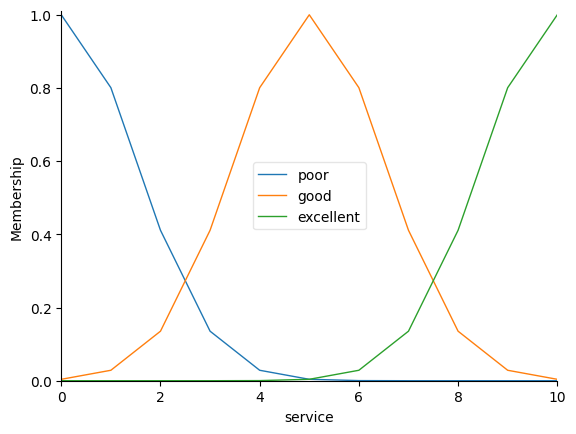

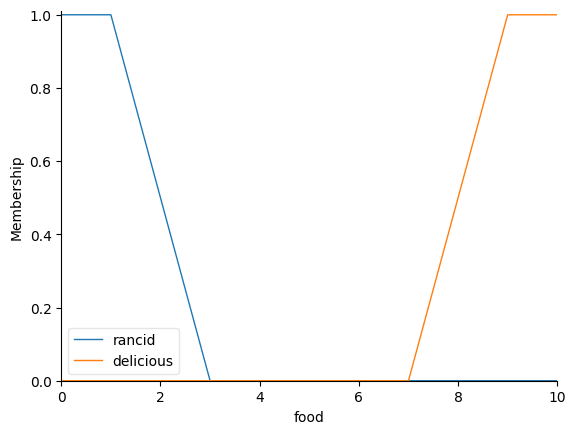

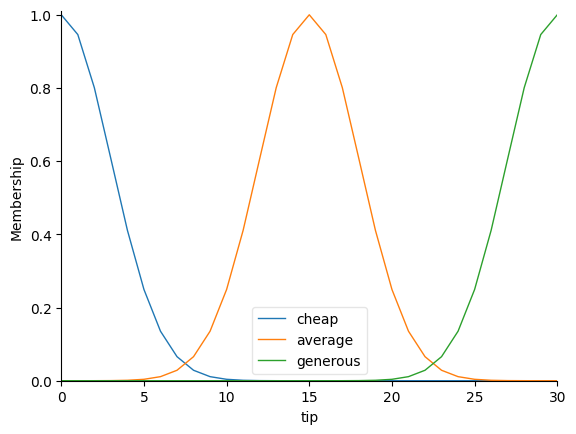

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip')

# Custom membership functions
service['poor'] = fuzz.gaussmf(service.universe, 0.0, 1.5)
service['good'] = fuzz.gaussmf(service.universe, 5.0, 1.5)
service['excellent'] = fuzz.gaussmf(service.universe, 10, 1.5)

service.view()

food['rancid'] = fuzz.trapmf(food.universe, [0.0, 0.0, 1.0, 3.0])
food['delicious'] = fuzz.trapmf(food.universe, [7.0, 9.0, 10.0, 10.0])

food.view()

tip['cheap'] = fuzz.gaussmf(tip.universe, 0.0, 3.0)
tip['average'] = fuzz.gaussmf(tip.universe, 15.0, 3.0)
tip['generous'] = fuzz.gaussmf(tip.universe, 30.0, 3.0)

tip.view()

# Rules

rule1 = ctrl.Rule(service['poor'] | food['rancid'], tip['cheap'])
rule2 = ctrl.Rule(service['good'], tip['average'])
rule3 = ctrl.Rule(service['excellent'] | food['delicious'], tip['generous'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels
tipping.input['food'] = 7.0
tipping.input['service'] = 2.0

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])



# Ejercicio 4

El problema consiste en desarrollar un FLC para un robot móvil diferencial quecuenta con dos motores (ruedas) y tres sensores IR para detectar obstáculos.

Se requiere desarrollar un sistema que le permita al robot navegar evitando colisiones con objetos en el entorno. Este tipo de comportamientos se suelen llamar “reactivos”. 

El diagrama mostrado a la derecha ilustra al robot con sus ruedas y la colocación de los sensores infrarrojos.

De tal manera que estamos considerando tres entradas: left_sensor, front_sensor y right_sensor, y como salidas tendremos acciones en cada una de las ruedas: left_motor y right_motor.

Los autores explican las razones por las que llegan a estas 8 reglas (Tabla III).

Basándose en cualquiera de las librerías, construya un controlador que permitaprobar el proceso.